In [2]:
import pandas as pd
import json
r_vs_h=pd.read_csv('C:/Users/Talha/Downloads/mucis.csv')

In [3]:
# json_data=json.load(open('C:/Users/Talha/Downloads/music.json'))

In [5]:
json_data=pd.read_json('C:/Users/Talha/Downloads/music.json')
json_data

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [13]:
json_data.shape

(13129, 9)

In [30]:
r_vs_h=r_vs_h[['track_id','bit_rate','genres','genres_all','genre_top']]

In [42]:
final_dataset=pd.merge(json_data,r_vs_h[['track_id','genre_top']],on='track_id')
final_dataset

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [43]:
relations=final_dataset.corr()
relations

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [44]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


In [46]:
cols=final_dataset.drop(['track_id','genre_top'],axis=1)
scaled_data=scale.fit_transform(cols)

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [65]:
pca=PCA()
pca.fit_transform(scaled_data)
variation_ratio=pca.explained_variance_ratio_

Text(0.5, 0, 'Principal Component #')

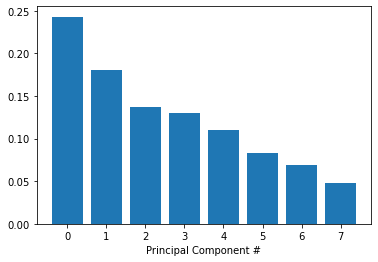

In [66]:
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), variation_ratio)
ax.set_xlabel('Principal Component #')

In [67]:
import numpy as np

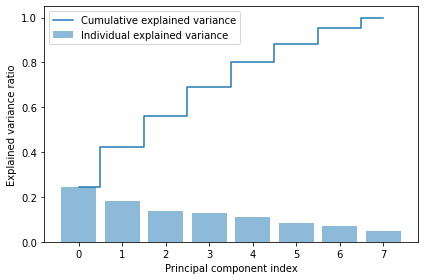

In [70]:
cum_sum_eigenvalues = np.cumsum(variation_ratio)
#
# Create the visualization plot
#
plt.bar(range(0,len(variation_ratio)), variation_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
train_x,test_x,train_y,test_y=train_test_split(scaled_data,final_dataset['genre_top'],random_state=0)


In [73]:
tree_to_classify=DecisionTreeClassifier(random_state=0)
tree_to_classify.fit(train_x,train_y)

DecisionTreeClassifier()

In [81]:
y_predict_tree=tree_to_classify.predict(test_x)

In [82]:
from sklearn import metrics

In [77]:
metrics.accuracy_score(y_predict_tree,test_y)

0.8717735220649458

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logistic_model=LogisticRegression(random_state=0)
logistic_model.fit(train_x,train_y)

LogisticRegression(random_state=0)

In [83]:
y_predict_logistix=logistic_model.predict(test_x)

In [84]:
metrics.accuracy_score(y_predict_logistix,test_y)

0.880932556203164

In [85]:
from sklearn.metrics import classification_report
print('report for classification\n',classification_report(test_y,y_predict_tree))

report for classification
               precision    recall  f1-score   support

     Hip-Hop       0.68      0.68      0.68       237
        Rock       0.92      0.92      0.92       964

    accuracy                           0.87      1201
   macro avg       0.80      0.80      0.80      1201
weighted avg       0.87      0.87      0.87      1201



In [86]:
print('report for logistic\n',classification_report(test_y,y_predict_logistix))

report for logistic
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.59      0.66       237
        Rock       0.90      0.95      0.93       964

    accuracy                           0.88      1201
   macro avg       0.83      0.77      0.79      1201
weighted avg       0.87      0.88      0.88      1201



In [87]:
hop_only = final_dataset.loc[final_dataset["genre_top"] == "Hip-Hop"]
rock_only = final_dataset.loc[final_dataset["genre_top"] == "Rock"].sample(len(hop_only), random_state=10)
rock_hop_bal = pd.concat([rock_only, hop_only])

In [88]:
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

In [93]:
pca_projection = pca.fit_transform(scale.fit_transform(features))
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.79      0.79      0.79       230
        Rock       0.78      0.78      0.78       225

    accuracy                           0.78       455
   macro avg       0.78      0.78      0.78       455
weighted avg       0.78      0.78      0.78       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.89      0.83      0.86       230
        Rock       0.83      0.89      0.86       225

    accuracy                           0.86       455
   macro avg       0.86      0.86      0.86       455
weighted avg       0.86      0.86      0.86       455



In [104]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', DecisionTreeClassifier( random_state=0))
])

In [109]:
from sklearn.model_selection import cross_val_score
depth=[]
for i in range(80,100):
    clf = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=train_features, y=train_labels, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
                 
print(depth)

[(80, 0.8630036630036629), (81, 0.8637362637362637), (82, 0.8659340659340659), (83, 0.871062271062271), (84, 0.8688644688644691), (85, 0.8688644688644691), (86, 0.868131868131868), (87, 0.8673992673992676), (88, 0.8659340659340659), (89, 0.8637362637362637), (90, 0.8644688644688644), (91, 0.8615384615384615), (92, 0.868131868131868), (93, 0.8695970695970695), (94, 0.8666666666666666), (95, 0.868131868131868), (96, 0.8688644688644688), (97, 0.871062271062271), (98, 0.8666666666666666), (99, 0.8652014652014651)]
